In [1]:
import numpy as np
from sympy import *

rho = 1.293 # air density

KT = 3e-6
#KT = symbols("K_T")

L = 0.15

Cd = 0.25
D = 0.2794 # m, diameter of propeller
R = D / 2

b = 0.5 * (R**3) * rho * Cd * 0.00354838
#b = symbols("b")

m = 0.792
g = 9.81
psi, theta, phi = symbols("psi, theta, phi")
phidot, thetadot, psidot = symbols(r"\dot{\psi}, \dot{\theta}, \dot{\phi}")

w1, w2, w3, w4 = symbols("omega_1, omega_2, omega_3, omega_4")

rot_matrix = Matrix([[1, 0, -sin(theta)],
                     [0, cos(phi), cos(theta)*sin(phi)],
                     [0, -sin(phi), cos(theta)*cos(phi)]])

thetadotvect = Matrix([[phidot],
                       [thetadot],
                       [psidot]])

omega = rot_matrix @ thetadotvect

Rmatrix = Matrix([[cos(psi)*cos(theta), cos(psi)*sin(phi)*sin(theta) - cos(phi)*sin(psi), cos(phi)*cos(psi)*sin(theta) + sin(phi)*sin(psi)],
                [sin(psi)*cos(theta), sin(phi)*sin(psi)*sin(theta), cos(phi)*sin(psi)*sin(theta) - cos(psi)*sin(phi)],
                [-sin(theta), cos(theta)*sin(phi), cos(phi)*cos(theta)]])

TB = KT * Matrix([[0],
             [0],
             [(w1**2 + w2**2 + w3**2 + w4**2)]])

tauB = Matrix([[L * KT * (w1**2 - w3**2)],
               [L * KT * (w2**2 - w4**2)],
               [b * (w1**2 - w2**2 + w3**2 - w4**2)]])

Ixx =  0.00914
Iyy = 0.00982
Izz = 0.00348
#Ixx, Iyy, Izz = symbols("I_xx, I_yy, I_zz")

I = Matrix([[Ixx, 0, 0],
            [0, Iyy, 0],
            [0, 0, Izz]])

omegadot = (I.inv()) @ (tauB - (omega.cross(I @ omega)))

#translational EOMs
xddot = (Rmatrix @ TB)[0] / m
yddot = (Rmatrix @ TB)[1] / m
zddot = ((Rmatrix @ TB)[2] - (m * g)) / m

#rotational EOMs IN BODY FRAME
omegaxdot = omegadot[0] # angular acceleration about x axis: roll rate?
omegaydot = omegadot[1] # angular acceleration about y axis: pitch rate?
omegazdot = omegadot[2] # angular acceleration about z axis: yaw rate?
omegaxdot


4.92341356673961e-5*omega_1**2 - 4.92341356673961e-5*omega_3**2 + 109.409190371991*(0.00982*\dot{\phi}*sin(phi)*cos(theta) + 0.00982*\dot{\theta}*cos(phi))*(\dot{\phi}*cos(phi)*cos(theta) - \dot{\theta}*sin(phi)) - 109.409190371991*(\dot{\phi}*sin(phi)*cos(theta) + \dot{\theta}*cos(phi))*(0.00348*\dot{\phi}*cos(phi)*cos(theta) - 0.00348*\dot{\theta}*sin(phi))

In [2]:
#calculate rotor velocity w0 for HOVER CONDITION
w0 = np.sqrt((m * g) / (4 * KT))
w0

804.6489917970443

In [3]:
#simulation - HOVER
import numpy as np
from sympy import *

import matplotlib.pyplot as plt
#propeller thrust coefficient
KT = 0.000003
dt = 1
total_time = 120

#Power calculations:
I0 = 0.3
#approximate current
I = 3
KV = 900
Kt = 602 * np.pi * KV
tau = Kt*(I - I0)
Pused = 0

#INITIAL CONDITIONS
#rotor angular velocities
#hover condition w0
w0 = 804.6489917970443

w1 = w0
w2 = w0
w3 = w0
w4 = w0

#roll, pitch, yaw
phi = 0
theta = 0
psi = 0

#roll rate, pitch rate, yaw rate
phidot = 0
thetadot = 0
psidot = 0

#position
x = 0
y = 0
z = 1

#speeds
dx = 0
dy = 0
dz = 0



x_vals = np.zeros(int(total_time / dt))
y_vals = np.zeros(int(total_time / dt))
z_vals = np.zeros(int(total_time / dt))

phi_vals = np.zeros(int(total_time / dt))
theta_vals = np.zeros(int(total_time / dt))
psi_vals = np.zeros(int(total_time / dt))

t = 0
t_vals = np.arange(0, total_time, dt)
for i in range(len(t_vals)):
    #EOMs
    xdd = -1.26262626262626*(np.sin(phi)*np.sin(psi) + np.sin(theta)*np.cos(phi)*np.cos(psi))*(KT*w1**2 + KT*w2**2 + KT*w3**2 + KT*w4**2)
    ydd = (1.26262626262626*(-np.sin(phi)*np.cos(psi) + np.sin(psi)*np.sin(theta)*np.cos(phi))*(KT*w1**2 + KT*w2**2 + KT*w3**2 + KT*w4**2))
    zdd = 1.26262626262626*(KT*w1**2 + KT*w2**2 + KT*w3**2 + KT*w4**2)*np.cos(phi)*np.cos(theta) - 9.81
    omegaxd = 4.92341356673961e-5*w1**2 - 4.92341356673961e-5*w3**2 + 109.409190371991*(0.00982*phidot*np.sin(phi)*np.cos(theta) + 0.00982*thetadot*np.cos(phi))*(phidot*np.cos(phi)*np.cos(theta) - thetadot*np.sin(phi)) - 109.409190371991*(phidot*np.sin(phi)*np.cos(theta) + thetadot*np.cos(phi))*(0.00348*phidot*np.cos(phi)*np.cos(theta) - 0.00348*thetadot*np.sin(phi))
    omegayd = 4.58248472505092e-5*w2**2 - 4.58248472505092e-5*w4**2 + 101.83299389002*(-phidot*np.sin(theta) + psidot)*(0.00348*phidot*np.cos(phi)*np.cos(theta) - 0.00348*thetadot*np.sin(phi)) - 101.83299389002*(-0.00914*phidot*np.sin(theta) + 0.00914*psidot)*(phidot*np.cos(phi)*np.cos(theta) - thetadot*np.sin(phi))
    omegazd = 287.35632183908*b*(w1**2 - w2**2 + w3**2 - w4**2) - 287.35632183908*(-phidot*np.sin(theta) + psidot)*(0.00982*phidot*np.sin(phi)*np.cos(theta) + 0.00982*thetadot*np.cos(phi)) + 287.35632183908*(-0.00914*phidot*np.sin(theta) + 0.00914*psidot)*(phidot*np.sin(phi)*np.cos(theta) + thetadot*np.cos(phi))

    dx += xdd * dt
    x += (dx * dt) + (0.5 * xdd * dt**2)
    x_vals[i] = x

    dy += ydd * dt
    y += (dy * dt) + (0.5 * ydd * dt**2)
    y_vals[i] = y

    dz += zdd * dt
    z += (dz * dt) + (0.5 * zdd * dt**2)
    z_vals[i] = z
    
    phidot += omegaxd * dt
    phi += (phidot * dt) + (0.5 * omegaxd * dt**2)
    phi_vals[i] = phi
    
    thetadot += omegayd * dt
    theta += (thetadot * dt) + (0.5 * omegayd * dt**2)
    theta_vals[i] = theta

    psidot += omegazd * dt
    psi += (psidot * dt) + (0.5 * omegazd * dt**2)
    psi_vals[i] = psi
    
    t += dt
    



Text(0.5, 0.92, '3D position over time - Performance Goal 1')

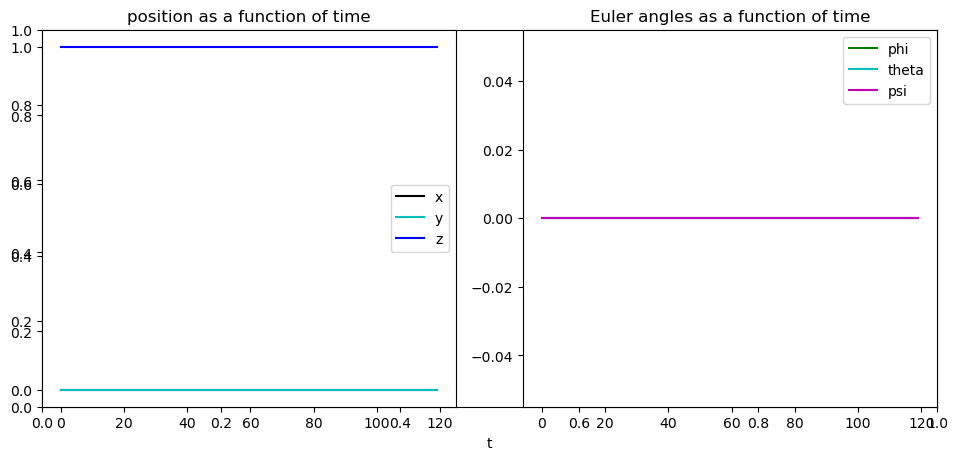

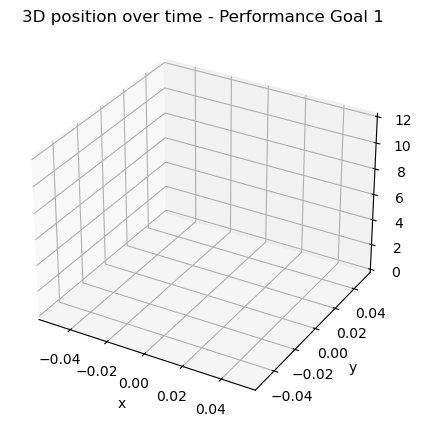

In [4]:
#Plot 2D and 3D results for HOVER:
#plotting results 2D
import matplotlib.pyplot as plt
fig1 = plt.figure(figsize=(10,5), tight_layout=True)
plt.xlabel("t")
ax1 = fig1.add_subplot(121)
ax1.plot(t_vals, x_vals, "k", label="x")
ax1.plot(t_vals, y_vals, "c", label="y")
ax1.plot(t_vals, z_vals, "b", label="z")
ax1.legend()
ax1.set_title("position as a function of time")

ax2 = fig1.add_subplot(122)
ax2.plot(t_vals, phi_vals, "g", label="phi")
ax2.plot(t_vals, theta_vals, "c", label = "theta")
ax2.plot(t_vals, psi_vals, "m", label= "psi")
ax2.legend()
ax2.set_title("Euler angles as a function of time")

#plotting results 3D
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection = "3d")
ax.plot3D(x_vals, y_vals, z_vals, label='Trajectory', color='black', linestyle='dotted')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_zlim(0,12)
ax.set_title("3D position over time - Performance Goal 1")


In [5]:
#calculate roll angle phi for turn of radius 2.0 and arbitrary tangential velocity 0.5 m/s for CIRCLE CONDITION
vt = 0.5
g = 9.81
R = 2.0
phicircle = np.arctan((vt**2) / (g * R))
np.degrees(phicircle)

#calculate rotor velocity required to maintain altitude during CIRCLE CONDITION
wcircle = np.sqrt((m * g) / (np.cos(phicircle) * 4 * KT))
np.degrees(phicircle)
0.5 / 2.0

0.25

In [6]:
#simulation - CIRCLE
import numpy as np
from sympy import *

import matplotlib.pyplot as plt
#propeller thrust coefficient
KT = 0.000003
dt = 0.01
total_time = 60
R = 2.0
#circle condition tangential velocity vt
vt = 0.5
#INITIAL CONDITIONS
#rotor angular velocities
#circle condition wcircle
wcircle = 804.681650734488

w1 = wcircle
w2 = wcircle
w3 = wcircle
w4 = wcircle

#roll, pitch, yaw
#circle condition phicircle
phicircle = 0.012741410358074377
phi = phicircle
theta = 0
psi = 0

#roll rate, pitch rate, yaw rate

phidot = 0
thetadot = 0
psidot = vt / R

#position
x = 0
y = 0
z = 1

#speeds
dx = vt * np.cos(phicircle)
dy = vt * np.sin(phicircle)
dz = 0

t = 0

x_vals = np.zeros(int(total_time / dt))
y_vals = np.zeros(int(total_time / dt))
z_vals = np.zeros(int(total_time / dt))

phi_vals = np.zeros(int(total_time / dt))
theta_vals = np.zeros(int(total_time / dt))
psi_vals = np.zeros(int(total_time / dt))


t_vals = np.arange(0, total_time, dt)
for i in range(len(t_vals)):
    #EOMs
    xdd = -1.26262626262626*(np.sin(phi)*np.sin(psi) + np.sin(theta)*np.cos(phi)*np.cos(psi))*(KT*w1**2 + KT*w2**2 + KT*w3**2 + KT*w4**2)
    ydd = (-1.26262626262626*(-np.sin(phi)*np.cos(psi) + np.sin(psi)*np.sin(theta)*np.cos(phi))*(KT*w1**2 + KT*w2**2 + KT*w3**2 + KT*w4**2))
    zdd = 1.26262626262626*(KT*w1**2 + KT*w2**2 + KT*w3**2 + KT*w4**2)*np.cos(phi)*np.cos(theta) - 9.81
    omegaxd = 4.92341356673961e-5*w1**2 - 4.92341356673961e-5*w3**2 + 109.409190371991*(0.00982*phidot*np.sin(phi)*np.cos(theta) + 0.00982*thetadot*np.cos(phi))*(phidot*np.cos(phi)*np.cos(theta) - thetadot*np.sin(phi)) - 109.409190371991*(phidot*np.sin(phi)*np.cos(theta) + thetadot*np.cos(phi))*(0.00348*phidot*np.cos(phi)*np.cos(theta) - 0.00348*thetadot*np.sin(phi))
    omegayd = 4.58248472505092e-5*w2**2 - 4.58248472505092e-5*w4**2 + 101.83299389002*(-phidot*np.sin(theta) + psidot)*(0.00348*phidot*np.cos(phi)*np.cos(theta) - 0.00348*thetadot*np.sin(phi)) - 101.83299389002*(-0.00914*phidot*np.sin(theta) + 0.00914*psidot)*(phidot*np.cos(phi)*np.cos(theta) - thetadot*np.sin(phi))
    omegazd = 287.35632183908*b*(w1**2 - w2**2 + w3**2 - w4**2) - 287.35632183908*(-phidot*np.sin(theta) + psidot)*(0.00982*phidot*np.sin(phi)*np.cos(theta) + 0.00982*thetadot*np.cos(phi)) + 287.35632183908*(-0.00914*phidot*np.sin(theta) + 0.00914*psidot)*(phidot*np.sin(phi)*np.cos(theta) + thetadot*np.cos(phi))

    dx += xdd * dt
    x += (dx * dt) + (0.5 * xdd * dt**2)
    x_vals[i] = x

    dy += ydd * dt
    y += (dy * dt) + (0.5 * ydd * dt**2)
    y_vals[i] = y

    dz += zdd * dt
    z += (dz * dt) + (0.5 * zdd * dt**2)
    z_vals[i] = z

    phidot += omegaxd * dt
    phi += (phidot * dt) + (0.5 * omegaxd * dt**2)
    phi_vals[i] = phi

    thetadot += omegayd * dt
    theta += (thetadot * dt) + (0.5 * omegayd * dt**2)
    theta_vals[i] = theta

    psidot += omegazd * dt
    psi += (psidot * dt) + (0.5 * omegazd * dt**2)
    psi_vals[i] = psi



Text(0.5, 0.92, '3D position over time - Performance Goal 2')

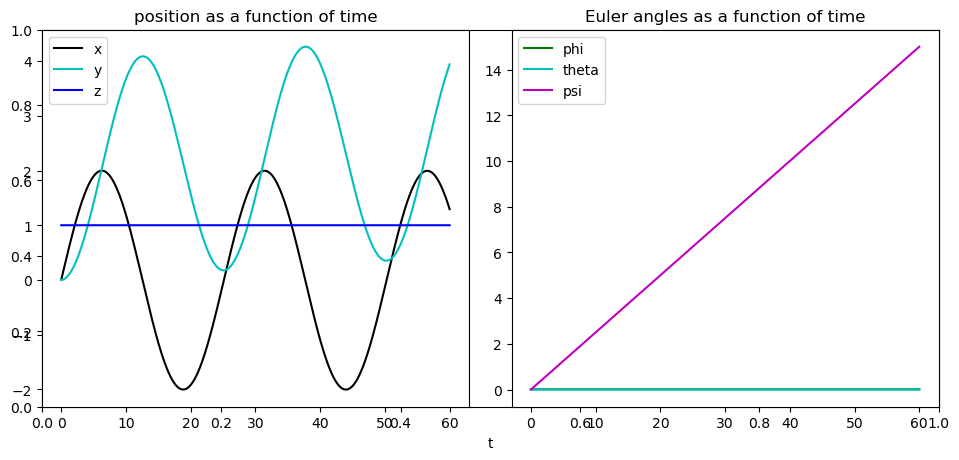

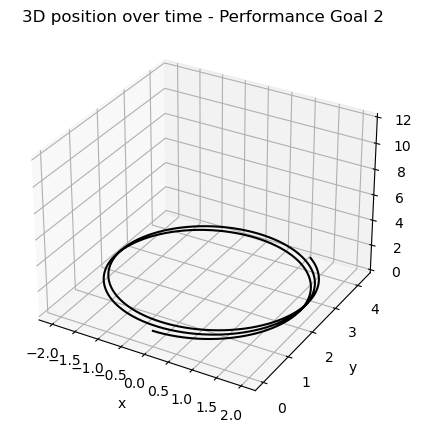

In [7]:
#Plot 2D and 3D results for CIRCLE:
#plotting results 2D
import matplotlib.pyplot as plt
fig1 = plt.figure(figsize=(10,5), tight_layout=True)
plt.xlabel("t")
ax1 = fig1.add_subplot(121)
ax1.plot(t_vals, x_vals, "k", label="x")
ax1.plot(t_vals, y_vals, "c", label="y")
ax1.plot(t_vals, z_vals, "b", label="z")
ax1.legend()
ax1.set_title("position as a function of time")

ax2 = fig1.add_subplot(122)
ax2.plot(t_vals, phi_vals, "g", label="phi")
ax2.plot(t_vals, theta_vals, "c", label = "theta")
ax2.plot(t_vals, psi_vals, "m", label= "psi")
ax2.legend()
ax2.set_title("Euler angles as a function of time")

#plotting results 3D
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection = "3d")
ax.plot3D(x_vals, y_vals, z_vals, label='Trajectory', color='black', linestyle='solid')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_zlim(0,12)
ax.set_title("3D position over time - Performance Goal 2")


In [16]:
#calculate rotor velocity wliftoff for PERFORMANCE GOAL 3
w0 = np.sqrt((m * g) / (4 * KT))
wlift = symbols("w_l")
thrust = 4 * KT * (wlift**2)
eq = Eq((thrust - m * g) / m, 0.5)
wlift = solve(eq, wlift)[1]

#we want to induce an angular acceleration of 0.5 rad/s^2 for the first 30 degrees of the yaw, then decelerate by the same amount for the last 30 degrees
torque = Izz * 0.5

#find the value of psidot for which to stop accelerating
wf = np.sqrt(np.pi / 3)


#torque for yawing calculations:
w0 = 804.6489917970443
hover_force = 4 * (KT*w0**2)

w1sym, w2sym, w3sym, w4sym = symbols("w_1, w_2, w_3, w_4")

w1 = w3
w2 = w4

eq1 = Eq(hover_force, ((KT*w1sym**2 + KT*w2sym**2 + KT*w1sym**2 + KT*w2sym**2)))

eq2 = Eq(b * (w1sym**2 - w2sym**2 + w1sym**2 - w2sym**2), torque)


ans = solve((eq1, eq2), (w1sym, w2sym))[3]
w13 = float(ans[0])
w24 = float(ans[1])
w24

804.4761011217365

In [11]:
#simulation - Performance goal 3
import numpy as np
from sympy import *

import matplotlib.pyplot as plt
#propeller thrust coefficient
KT = 0.000003
dt = 0.01
total_time = 120
R = 2.0
#circle condition tangential velocity vt
vt = 0.5
#INITIAL CONDITIONS
#rotor angular velocities
#liftoff condition
wliftoff = 824.899993938661
wdecel = 783.874990033489
wland = 804.646941210866
#circle condition
wcircle = 804.681650734488
#hover condition w0
w0 = 804.6489917970443

w1 = wliftoff
w2 = wliftoff
w3 = wliftoff
w4 = wliftoff

#roll, pitch, yaw
#phi circle condition
phicircle = 0.012741410358074377

phi = 0
theta = 0
psi = 0

#roll rate, pitch rate, yaw rate

phidot = 0
thetadot = 0
psidot = 0

#position
x = 0
y = 0
z = 0

#speeds
dx = 0
dy = 0
dz = 0

t = 0

x_vals = np.zeros(int(total_time / dt))
y_vals = np.zeros(int(total_time / dt))
z_vals = np.zeros(int(total_time / dt))

phi_vals = np.zeros(int(total_time / dt))
theta_vals = np.zeros(int(total_time / dt))
psi_vals = np.zeros(int(total_time / dt))


t_vals = np.arange(0, total_time, dt)
switch1 = False
switch2 = False
switch3 = False
switch5 = True
switch4 = False
switch6 = False
switch7 = False

tmark = 1000000000000
for i in range(len(t_vals)):

    if (t > 0.9999999999 and t < 1.000000000001):
        w1 = w2 = w3 = w4 = w0

    if (t > 1.999999999999 and t < 2.0000000001):
        w1 = w2 = w3 = w4 = wdecel
    
    if (t > 2.999999999999 and t < 3.00000000001):
        w1 = w2 = w3 = w4 = w0
    
    if (t > 3.000000001 and t < 3.01):
        dx = 1

    if (x > 0.9999999999 and x < 1.0000000001):
        dx = 0
        switch1 = True

    if (switch1):
        w1 = w3 = w13
        w2 = w4 = w24
        switch1 = False
        switch5 = True

    if (switch5):
        if (psi >= np.radians(30)):
            w1 = w2 = w3 = w4 = w0
            switch5 = False
            switch2 = True

    
    if (switch2):
        if (psi >= np.radians(60)):
            w1 = w3 = w24
            w2 = w4 = w13
            switch2 = False
            switch3 = True
    
    if (switch3):
        if (psidot > -0.0000001 and psidot < 0.000000001):
            w1 = w2 = w3 = w4 = w0
            switch3 = False
            switch4 = True
    if (switch4):
        dy = 1
        switch4 = False
    
    
    if (y >= 4.999999999 and y <= 5.000000001):
        dy = 0
        switch6 = True
        
    if (switch6):
        w1 = w2 = w3 = w4 = wdecel
        switch7 = True

    if (switch7):
        if (dz > -0.010000001 and dz < -0.00999999999):
            w1 = w2 = w3 = w4 = w0
        if (z > -0.000001 and z < 0.000001):
            dz = 0
    #EOMs
    xdd = -1.26262626262626*(np.sin(phi)*np.sin(psi) + np.sin(theta)*np.cos(phi)*np.cos(psi))*(KT*w1**2 + KT*w2**2 + KT*w3**2 + KT*w4**2)
    ydd = -(1.26262626262626*(-np.sin(phi)*np.cos(psi) + np.sin(psi)*np.sin(theta)*np.cos(phi))*(KT*w1**2 + KT*w2**2 + KT*w3**2 + KT*w4**2))
    zdd = 1.26262626262626*(KT*w1**2 + KT*w2**2 + KT*w3**2 + KT*w4**2)*np.cos(phi)*np.cos(theta) - 9.81
    omegaxd = 4.92341356673961e-5*w1**2 - 4.92341356673961e-5*w3**2 + 109.409190371991*(0.00982*phidot*np.sin(phi)*np.cos(theta) + 0.00982*thetadot*np.cos(phi))*(phidot*np.cos(phi)*np.cos(theta) - thetadot*np.sin(phi)) - 109.409190371991*(phidot*np.sin(phi)*np.cos(theta) + thetadot*np.cos(phi))*(0.00348*phidot*np.cos(phi)*np.cos(theta) - 0.00348*thetadot*np.sin(phi))
    omegayd = 4.58248472505092e-5*w2**2 - 4.58248472505092e-5*w4**2 + 101.83299389002*(-phidot*np.sin(theta) + psidot)*(0.00348*phidot*np.cos(phi)*np.cos(theta) - 0.00348*thetadot*np.sin(phi)) - 101.83299389002*(-0.00914*phidot*np.sin(theta) + 0.00914*psidot)*(phidot*np.cos(phi)*np.cos(theta) - thetadot*np.sin(phi))
    omegazd = 287.35632183908*b*(w1**2 - w2**2 + w3**2 - w4**2) - 287.35632183908*(-phidot*np.sin(theta) + psidot)*(0.00982*phidot*np.sin(phi)*np.cos(theta) + 0.00982*thetadot*np.cos(phi)) + 287.35632183908*(-0.00914*phidot*np.sin(theta) + 0.00914*psidot)*(phidot*np.sin(phi)*np.cos(theta) + thetadot*np.cos(phi))

    dx += xdd * dt
    x += (dx * dt) + (0.5 * xdd * dt**2)
    x_vals[i] = x

    dy += ydd * dt
    y += (dy * dt) + (0.5 * ydd * dt**2)
    y_vals[i] = y

    dz += zdd * dt
    z += (dz * dt) + (0.5 * zdd * dt**2)
    z_vals[i] = z

    phidot += omegaxd * dt
    phi += (phidot * dt) + (0.5 * omegaxd * dt**2)
    phi_vals[i] = phi

    thetadot += omegayd * dt
    theta += (thetadot * dt) + (0.5 * omegayd * dt**2)
    theta_vals[i] = theta

    psidot += omegazd * dt
    psi += (psidot * dt) + (0.5 * omegazd * dt**2)
    psi_vals[i] = psi
    t += dt

Text(0.5, 0.92, '3D position over time - Performance Goal 3')

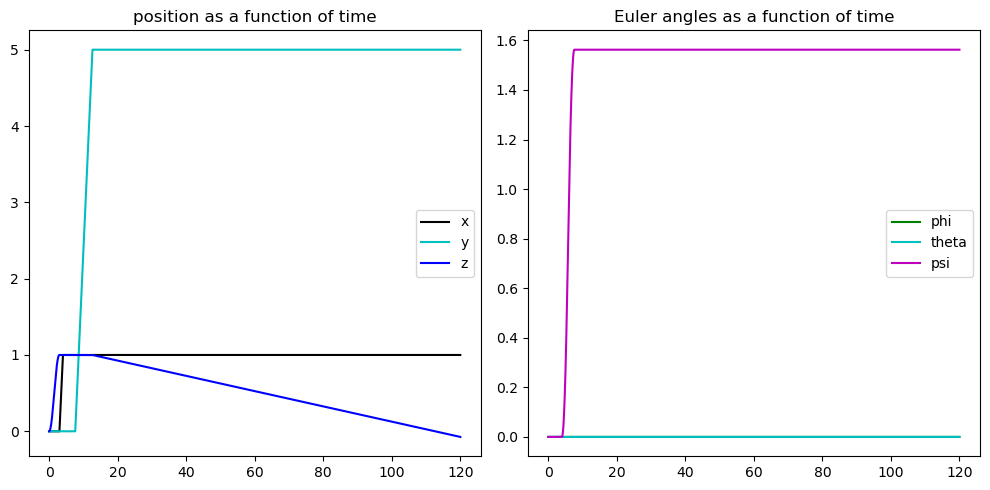

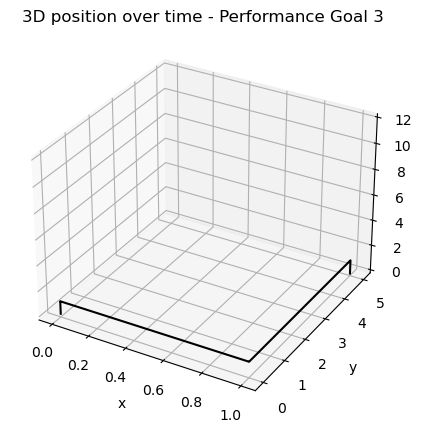

In [12]:
#Plot 2D and 3D results for CIRCLE:
#plotting results 2D
import matplotlib.pyplot as plt
fig1 = plt.figure(figsize=(10,5), tight_layout=True)

ax1 = fig1.add_subplot(121)
ax1.plot(t_vals, x_vals, "k", label="x")
ax1.plot(t_vals, y_vals, "c", label="y")
ax1.plot(t_vals, z_vals, "b", label="z")
ax1.legend()
ax1.set_title("position as a function of time")

ax2 = fig1.add_subplot(122)
ax2.plot(t_vals, phi_vals, "g", label="phi")
ax2.plot(t_vals, theta_vals, "c", label = "theta")
ax2.plot(t_vals, psi_vals, "m", label= "psi")
ax2.legend()
ax2.set_title("Euler angles as a function of time")

#plotting results 3D
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection = "3d")
ax.plot3D(x_vals, y_vals, z_vals, label='Trajectory', color='black', linestyle='solid')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_zlim(0,12)
ax.set_title("3D position over time - Performance Goal 3")

28.64788975654116

In [53]:
#Yawing testing -IGNORE ALL THIS STUFF THIS IS FOR TESTING
#simulation - HOVER
import numpy as np
from sympy import *

import matplotlib.pyplot as plt
#propeller thrust coefficient
KT = 0.000003
dt = 0.01
total_time = 60

#Power calculations:
I0 = 0.3
#approximate current
I = 6
KV = 900
Kt = 501 / 1000
tau = Kt*(I - I0)
Pused = 0

#INITIAL CONDITIONS
#rotor angular velocities
#hover condition
w0 = 804.6489917970443
w13 = 804.658926913942
w24 = 804.639056557475

w1 = w0
w2 = w0
w3 = w0
w4 = w0

#roll, pitch, yaw
phi = 0
theta = 0
psi = 0

#roll rate, pitch rate, yaw rate
phidot = 0
thetadot = 0
psidot = 0

#position
x = 0
y = 0
z = 10

#speeds
dx = 0
dy = 0
dz = 0

t = 0

x_vals = np.zeros(int(total_time / dt))
y_vals = np.zeros(int(total_time / dt))
z_vals = np.zeros(int(total_time / dt))

phi_vals = np.zeros(int(total_time / dt))
theta_vals = np.zeros(int(total_time / dt))
psi_vals = np.zeros(int(total_time / dt))

t_vals = np.arange(0, total_time, dt)
for i in range(len(t_vals)):
    #EOMs
    if (psi < np.radians(90)):
        w1 = w3 = w13
        w2 = w4 = w24
    
    if (psi >= np.radians(90)):
        w1 = w2 = w3 = w4 = w0
        psidot = 0
    



    xdd = -1.26262626262626*(np.sin(phi)*np.sin(psi) + np.sin(theta)*np.cos(phi)*np.cos(psi))*(KT*w1**2 + KT*w2**2 + KT*w3**2 + KT*w4**2)
    ydd = (1.26262626262626*(-np.sin(phi)*np.cos(psi) + np.sin(psi)*np.sin(theta)*np.cos(phi))*(KT*w1**2 + KT*w2**2 + KT*w3**2 + KT*w4**2))
    zdd = 1.26262626262626*(KT*w1**2 + KT*w2**2 + KT*w3**2 + KT*w4**2)*np.cos(phi)*np.cos(theta) - 9.81
    omegaxd = 4.92341356673961e-5*w1**2 - 4.92341356673961e-5*w3**2 + 109.409190371991*(0.00982*phidot*np.sin(phi)*np.cos(theta) + 0.00982*thetadot*np.cos(phi))*(phidot*np.cos(phi)*np.cos(theta) - thetadot*np.sin(phi)) - 109.409190371991*(phidot*np.sin(phi)*np.cos(theta) + thetadot*np.cos(phi))*(0.00348*phidot*np.cos(phi)*np.cos(theta) - 0.00348*thetadot*np.sin(phi))
    omegayd = 4.58248472505092e-5*w2**2 - 4.58248472505092e-5*w4**2 + 101.83299389002*(-phidot*np.sin(theta) + psidot)*(0.00348*phidot*np.cos(phi)*np.cos(theta) - 0.00348*thetadot*np.sin(phi)) - 101.83299389002*(-0.00914*phidot*np.sin(theta) + 0.00914*psidot)*(phidot*np.cos(phi)*np.cos(theta) - thetadot*np.sin(phi))
    omegazd = 287.35632183908*b*(w1**2 - w2**2 + w3**2 - w4**2) - 287.35632183908*(-phidot*np.sin(theta) + psidot)*(0.00982*phidot*np.sin(phi)*np.cos(theta) + 0.00982*thetadot*np.cos(phi)) + 287.35632183908*(-0.00914*phidot*np.sin(theta) + 0.00914*psidot)*(phidot*np.sin(phi)*np.cos(theta) + thetadot*np.cos(phi))

    dx += xdd * dt
    x += (dx * dt) + (0.5 * xdd * dt**2)
    x_vals[i] = x

    dy += ydd * dt
    y += (dy * dt) + (0.5 * ydd * dt**2)
    y_vals[i] = y

    dz += zdd * dt
    z += (dz * dt) + (0.5 * zdd * dt**2)
    z_vals[i] = z
    
    phidot += omegaxd * dt
    phi += (phidot * dt) + (0.5 * omegaxd * dt**2)
    phi_vals[i] = phi
    
    thetadot += omegayd * dt
    theta += (thetadot * dt) + (0.5 * omegayd * dt**2)
    theta_vals[i] = theta

    psidot += omegazd * dt
    psi += (psidot * dt) + (0.5 * omegazd * dt**2)
    psi_vals[i] = psi
    t += dt


Text(0.5, 0.92, '3D position over time')

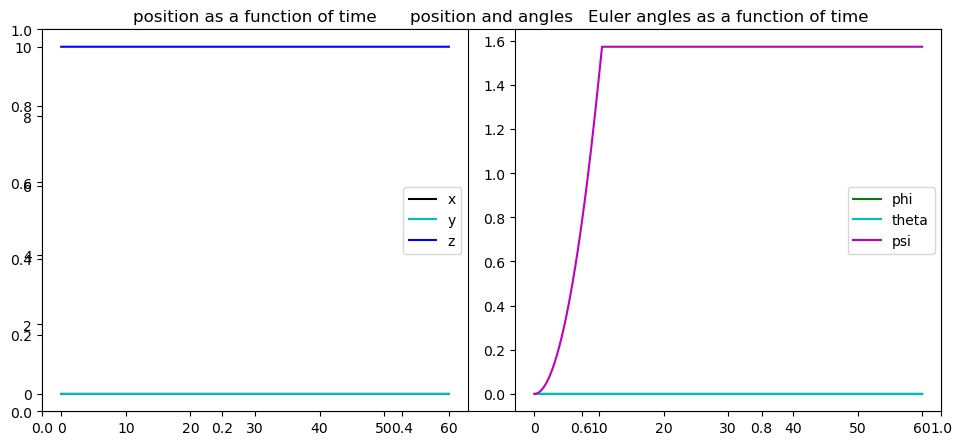

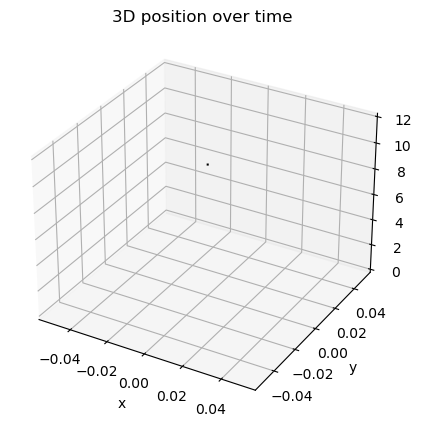

In [54]:
#Plot 2D and 3D results for YAW:
#plotting results 2D
import matplotlib.pyplot as plt
fig1 = plt.figure(figsize=(10,5), tight_layout=True)
plt.title("position and angles")
ax1 = fig1.add_subplot(121)
ax1.plot(t_vals, x_vals, "k", label="x")
ax1.plot(t_vals, y_vals, "c", label="y")
ax1.plot(t_vals, z_vals, "b", label="z")
ax1.legend()
ax1.set_title("position as a function of time")

ax2 = fig1.add_subplot(122)
ax2.plot(t_vals, phi_vals, "g", label="phi")
ax2.plot(t_vals, theta_vals, "c", label = "theta")
ax2.plot(t_vals, psi_vals, "m", label= "psi")
ax2.legend()
ax2.set_title("Euler angles as a function of time")

#plotting results 3D
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection = "3d")
ax.plot3D(x_vals, y_vals, z_vals, label='Trajectory', color='black', linestyle='solid')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_zlim(0,12)
ax.set_title("3D position over time")